### Projet: Milestone 4

Author: Barbara Jean

Date: 05/21/2023

output: pdf_document

### Connecting to an API/Pulling in the Data and Cleaning/Formatting

API:  US Public School

### Perform at least 5 data transformation and/or cleansing steps to the API data

In [1]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
from html_table_parser.parser import HTMLTableParser
import seaborn as sns
import requests
import json

In [2]:
# Handling warnings as errors 
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_name = 'C:/Users/79bar/dsc540/us-public-schools@public.json' # Reading the json file

In [4]:
with open(file_name, 'r') as f: # Opening the file
    data=json.load(f) # parse the JSON with load()

In [5]:
# Retrieving five values on the list 
print(data[0:4])  # Showing data

[{'geo_point_2d': {'lon': -70.95749886299996, 'lat': 42.07853752600005}, 'geo_shape': {'type': 'Feature', 'geometry': {'coordinates': [-70.95749886299996, 42.07853752600005], 'type': 'Point'}, 'properties': {}}, 'objectid': '100033', 'ncesid': '251293000207', 'name': 'WHITMAN MIDDLE', 'address': '101 CORTHELL AVENUE', 'city': 'WHITMAN', 'state': 'MA', 'zip': '02382', 'zip4': 'NOT AVAILABLE', 'telephone': '(781) 618-7035', 'type': '1', 'status': '1', 'population': '584', 'county': 'PLYMOUTH', 'countyfips': '25023', 'country': 'USA', 'latitude': '42.07853752600005', 'longitude': '-70.95749886299996', 'naics_code': '611110', 'naics_desc': 'ELEMENTARY AND SECONDARY SCHOOLS', 'source': 'http://nces.ed.gov/GLOBALLOCATOR/sch_info_popup.asp?Type=Public&ID=251293000207', 'sourcedate': '2009-10-13T00:00:00Z', 'val_method': 'IMAGERY', 'val_date': '2016-04-21T00:00:00Z', 'website': 'http://www.whrsd.org', 'level': 'OTHER', 'enrollment': '549', 'st_grade': '06', 'end_grade': '08', 'districtid': '25

In [6]:
df = pd.DataFrame(data) # Putting data into a Dataframe
df # Displaying data             

,geo_point_2d,geo_shape,objectid,ncesid,name,address,city,state,zip,zip4,...,val_method,val_date,website,level,enrollment,st_grade,end_grade,districtid,ft_teacher,shelter_id
0,"{'lon': -70.95749886299996, 'lat': 42.07853752...","{'type': 'Feature', 'geometry': {'coordinates'...",100033,251293000207,WHITMAN MIDDLE,101 CORTHELL AVENUE,WHITMAN,MA,02382,NOT AVAILABLE,...,IMAGERY,2016-04-21T00:00:00Z,http://www.whrsd.org,OTHER,549,06,08,2512930,35,10821300
1,"{'lon': -77.03579845099995, 'lat': 38.92930008...","{'type': 'Feature', 'geometry': {'coordinates'...",100045,110003000396,COLUMBIA HEIGHTS EDUCATION CAMPUS,3101 16TH ST. NW,WASHINGTON,DC,20010,NOT AVAILABLE,...,IMAGERY,2011-09-30T00:00:00Z,http://checdc.org,MIDDLE,1477,06,12,1100030,114,NOT AVAILABLE
2,"{'lon': -83.08189836599996, 'lat': 39.96145409...","{'type': 'Feature', 'geometry': {'coordinates'...",100050,390438000575,VALLEYVIEW ELEMENTARY SCHOOL,2989 VALLEYVIEW DR,COLUMBUS,OH,43204,2012,...,IMAGERY/OTHER,2016-08-25T00:00:00Z,NOT AVAILABLE,OTHER,240,PK,05,3904380,17,NOT AVAILABLE
3,"{'lon': -90.30395264199996, 'lat': 32.36653015...","{'type': 'Feature', 'geometry': {'coordinates'...",100101,280109000136,NORTHSIDE ELEM,451 ARROW DRIVE,CLINTON,MS,39056,NOT AVAILABLE,...,IMAGERY/OTHER,2020-04-20T00:00:00Z,http://www.clintonpublicschools.com,HIGH,733,02,03,2801090,40,NOT AVAILABLE
4,"{'lon': -85.77584969199995, 'lat': 33.63209887...","{'type': 'Feature', 'geometry': {'coordinates'...",100137,010009000017,GOLDEN SPRINGS ELEMENTARY SCHOOL,100 FEARY DR,ANNISTON,AL,36207,NOT AVAILABLE,...,IMAGERY,2016-01-28T00:00:00Z,http://www.annistonschools.com,ELEMENTARY,266,01,05,0100090,15,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107294,"{'lon': -87.65216338699997, 'lat': 41.96596074...","{'type': 'Feature', 'geometry': {'coordinates'...",39798,170993005787,UPLIFT COMMUNITY HIGH SCHOOL,900 W WILSON AVE,CHICAGO,IL,60640,5707,...,IMAGERY,2010-05-11T00:00:00Z,http://www.cps.edu,ELEMENTARY,61,09,12,1709930,-999,NOT AVAILABLE
107295,"{'lon': -68.50753154499995, 'lat': 45.36369082...","{'type': 'Feature', 'geometry': {'coordinates'...",39849,230910000233,NO PENOBSCOT TECH-REGION 3,35 WEST BROADWAY,LINCOLN,ME,04457,NOT AVAILABLE,...,GEOCODE,2010-08-17T00:00:00Z,http://region3.mainecte.org/,ELEMENTARY,-999,N,N,2309100,14,NOT AVAILABLE
107296,"{'lon': -81.64820970899996, 'lat': 29.64005059...","{'type': 'Feature', 'geometry': {'coordinates'...",39859,120162008194,PUTNAM EDGE HIGH SCHOOL,200 S 7TH ST,PALATKA,FL,32177,4612,...,GEOCODE,2015-06-26T00:00:00Z,http://www.putnamedge.org/,ELEMENTARY,66,09,12,1201620,4,NOT AVAILABLE
107297,"{'lon': -116.09761227499996, 'lat': 41.9429824...","{'type': 'Feature', 'geometry': {'coordinates'...",39868,320012000610,OWYHEE HIGH SCHOOL,100 ACADEMIC WAY,OWYHEE,NV,89832,NOT AVAILABLE,...,IMAGERY,2010-05-27T00:00:00Z,http://www.owyhee.ecsdnv.net/,MIDDLE,85,09,12,3200120,11,NOT AVAILABLE


### Step 1: Drop unnecessary columns

To remove unnecessary columns from a dataset, the pandas library offers the .drop() method, which can be used by specifying the column names.

In [7]:
# Removing two columns name is 'geo_point_2d' and 'geo_shape'
df1= df.drop(['geo_point_2d', 'geo_shape'], axis=1)
df1.head()

,objectid,ncesid,name,address,city,state,zip,zip4,telephone,type,...,val_method,val_date,website,level,enrollment,st_grade,end_grade,districtid,ft_teacher,shelter_id
0,100033,251293000207,WHITMAN MIDDLE,101 CORTHELL AVENUE,WHITMAN,MA,02382,NOT AVAILABLE,(781) 618-7035,1,...,IMAGERY,2016-04-21T00:00:00Z,http://www.whrsd.org,OTHER,549,06,08,2512930,35,10821300
1,100045,110003000396,COLUMBIA HEIGHTS EDUCATION CAMPUS,3101 16TH ST. NW,WASHINGTON,DC,20010,NOT AVAILABLE,(202) 939-7700,1,...,IMAGERY,2011-09-30T00:00:00Z,http://checdc.org,MIDDLE,1477,06,12,1100030,114,NOT AVAILABLE
2,100050,390438000575,VALLEYVIEW ELEMENTARY SCHOOL,2989 VALLEYVIEW DR,COLUMBUS,OH,43204,2012,(614) 365-6312,1,...,IMAGERY/OTHER,2016-08-25T00:00:00Z,NOT AVAILABLE,OTHER,240,PK,05,3904380,17,NOT AVAILABLE
3,100101,280109000136,NORTHSIDE ELEM,451 ARROW DRIVE,CLINTON,MS,39056,NOT AVAILABLE,(601) 924-7531,1,...,IMAGERY/OTHER,2020-04-20T00:00:00Z,http://www.clintonpublicschools.com,HIGH,733,02,03,2801090,40,NOT AVAILABLE
4,100137,010009000017,GOLDEN SPRINGS ELEMENTARY SCHOOL,100 FEARY DR,ANNISTON,AL,36207,NOT AVAILABLE,(256) 231-5050,1,...,IMAGERY,2016-01-28T00:00:00Z,http://www.annistonschools.com,ELEMENTARY,266,01,05,0100090,15,NOT AVAILABLE


As we can see, the columns that were passed as input are not present in the updated output. This happened because the axis was set to 1 and the changes were made to the original data frame, which caused the corresponding values to be deleted. 

### Step 2: Convert entire dataframe to lower case

In [8]:
# Converting entire dataframe to lower case
df2 = df1.applymap(lambda s: s.lower() if type(s) == str else s) # Using the applymap() function

In [9]:
# applying uppercase to 'state' colunm using upper() method.
df2['state'] = df2['state'].str.upper()
df2.head()

,objectid,ncesid,name,address,city,state,zip,zip4,telephone,type,...,val_method,val_date,website,level,enrollment,st_grade,end_grade,districtid,ft_teacher,shelter_id
0,100033,251293000207,whitman middle,101 corthell avenue,whitman,MA,02382,not available,(781) 618-7035,1,...,imagery,2016-04-21t00:00:00z,http://www.whrsd.org,other,549,06,08,2512930,35,10821300
1,100045,110003000396,columbia heights education campus,3101 16th st. nw,washington,DC,20010,not available,(202) 939-7700,1,...,imagery,2011-09-30t00:00:00z,http://checdc.org,middle,1477,06,12,1100030,114,not available
2,100050,390438000575,valleyview elementary school,2989 valleyview dr,columbus,OH,43204,2012,(614) 365-6312,1,...,imagery/other,2016-08-25t00:00:00z,not available,other,240,pk,05,3904380,17,not available
3,100101,280109000136,northside elem,451 arrow drive,clinton,MS,39056,not available,(601) 924-7531,1,...,imagery/other,2020-04-20t00:00:00z,http://www.clintonpublicschools.com,high,733,02,03,2801090,40,not available
4,100137,010009000017,golden springs elementary school,100 feary dr,anniston,AL,36207,not available,(256) 231-5050,1,...,imagery,2016-01-28t00:00:00z,http://www.annistonschools.com,elementary,266,01,05,0100090,15,not available


In [10]:
df2.to_csv('C:/Users/79bar/dsc540/school.csv', index = True)

**Check dimensions of the data set , data types and statistical summary of the variables**

In [11]:
df2.shape # Returning a tuple representing the dimensionality of the DataFrame

(107299, 31)

In [12]:
df2.size # Returning an int representing the number of elements in this object

3326269

In [13]:
df2.columns # Showing columns names

Index(['objectid', 'ncesid', 'name', 'address', 'city', 'state', 'zip', 'zip4',
       'telephone', 'type', 'status', 'population', 'county', 'countyfips',
       'country', 'latitude', 'longitude', 'naics_code', 'naics_desc',
       'source', 'sourcedate', 'val_method', 'val_date', 'website', 'level',
       'enrollment', 'st_grade', 'end_grade', 'districtid', 'ft_teacher',
       'shelter_id'],
      dtype='object')

In [14]:
df2.info() # Printing a summary of the dataframe, index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107299 entries, 0 to 107298
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   objectid    107299 non-null  object
 1   ncesid      107299 non-null  object
 2   name        107299 non-null  object
 3   address     107299 non-null  object
 4   city        107299 non-null  object
 5   state       107299 non-null  object
 6   zip         107299 non-null  object
 7   zip4        107299 non-null  object
 8   telephone   107299 non-null  object
 9   type        107299 non-null  object
 10  status      107299 non-null  object
 11  population  107299 non-null  object
 12  county      107299 non-null  object
 13  countyfips  107299 non-null  object
 14  country     107299 non-null  object
 15  latitude    107299 non-null  object
 16  longitude   107299 non-null  object
 17  naics_code  107299 non-null  object
 18  naics_desc  107299 non-null  object
 19  source      107299 non-

Those output show us that we are working with a set of 107299 and 31 columns. All of the column variables are encoded as object.

After getting sense ot the data's structure, look at the statistical summary of the variables with describe(). The describe() function could help to identify outlier in the data set.

We can ge a summary of categorical variables by passing those columns to describe() and gives a consice overview of each varibles.

In [15]:
df2.describe() # looking at the statistical summary of the variables with describe()

,objectid,ncesid,name,address,city,state,zip,zip4,telephone,type,...,val_method,val_date,website,level,enrollment,st_grade,end_grade,districtid,ft_teacher,shelter_id
count,107299,107299,107299,107299,107299,107299,107299,107299,107299,107299,...,107299,107299,107299,101688,107299,107299,107299,107299,107299,107299
unique,107299,101707,87167,92588,12616,56,22432,8721,93004,4,...,4,664,40625,10,3029,18,19,18543,280,21958
top,100033,251293000207,lincoln elementary school,box doe,houston,CA,10456,not available,(972) 316-3663,1,...,imagery/other,2022-05-13t00:00:00z,not available,elementary,-999,pk,05,7200030,-999,not available
freq,1,2,95,31,885,11012,51,43131,37,97428,...,68064,4864,38512,53041,3161,33774,29862,894,11330,82511


### Step 3: Identify and deal missing data

As per the API documentation on the website, certain data is unavailable and is replaced with the words 'not available' and -999 values in the dataset.

In [16]:
df2.isnull().any() # Checking missing value

objectid      False
ncesid        False
name          False
address       False
city          False
state         False
zip           False
zip4          False
telephone     False
type          False
status        False
population    False
county        False
countyfips    False
country       False
latitude      False
longitude     False
naics_code    False
naics_desc    False
source        False
sourcedate    False
val_method    False
val_date      False
website       False
level          True
enrollment    False
st_grade      False
end_grade     False
districtid    False
ft_teacher    False
shelter_id    False
dtype: bool

In [17]:
df2.isnull().sum() # Detecting missing value using interger

objectid         0
ncesid           0
name             0
address          0
city             0
state            0
zip              0
zip4             0
telephone        0
type             0
status           0
population       0
county           0
countyfips       0
country          0
latitude         0
longitude        0
naics_code       0
naics_desc       0
source           0
sourcedate       0
val_method       0
val_date         0
website          0
level         5611
enrollment       0
st_grade         0
end_grade        0
districtid       0
ft_teacher       0
shelter_id       0
dtype: int64

In [18]:
df2.isnull().sum().sum() # Detecting missing value using interger

5611

As we can see there are missing values in the dataset for level variables. Missing data can be handled in several ways. The data will have a big impact on how to handle missing data. In my case, the missing information relates to a survey from a US school. Some information is maybe not available. 

#### Deal with missing data

According to this, I choose to replace missing value with string 'not available' by using replace()function.

In [19]:
# Using replace()function to fill missing data with 'not available'
df3=df2.replace(to_replace=np.nan, value='not available')
df3.isnull().sum()

objectid      0
ncesid        0
name          0
address       0
city          0
state         0
zip           0
zip4          0
telephone     0
type          0
status        0
population    0
county        0
countyfips    0
country       0
latitude      0
longitude     0
naics_code    0
naics_desc    0
source        0
sourcedate    0
val_method    0
val_date      0
website       0
level         0
enrollment    0
st_grade      0
end_grade     0
districtid    0
ft_teacher    0
shelter_id    0
dtype: int64

### Step 4: Deal with inconsistent  values

Some of the variables may be encoded as data int  and float before outliers in the data set are discovered.

In [20]:
# Defining a list of columns to be converted to int
columns_int = ['population', 'ft_teacher','enrollment']
# Converting the columns to int by using astype() function
df3[columns_int]= df3[columns_int].astype(int)

In [21]:
# Converting column to datetime pandas
columns_date = ['sourcedate','val_date']
# Converting the columns to date by using astype() function
df3[columns_date]= df3[columns_date].astype('datetime64[ns]')

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107299 entries, 0 to 107298
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   objectid    107299 non-null  object        
 1   ncesid      107299 non-null  object        
 2   name        107299 non-null  object        
 3   address     107299 non-null  object        
 4   city        107299 non-null  object        
 5   state       107299 non-null  object        
 6   zip         107299 non-null  object        
 7   zip4        107299 non-null  object        
 8   telephone   107299 non-null  object        
 9   type        107299 non-null  object        
 10  status      107299 non-null  object        
 11  population  107299 non-null  int32         
 12  county      107299 non-null  object        
 13  countyfips  107299 non-null  object        
 14  country     107299 non-null  object        
 15  latitude    107299 non-null  object        
 16  lo

### Step 5: Find outliers

Outliers are the extreme values found in a dataset when exploring it. This indicates that the outlier data points deviate significantly from the predicted values, either being noticeably larger or smaller. Creating plot is one of the quickest way to detect outliers. 

Using describe() gives descriptive statistics those that, excluding NaN values, summarize the central tendency, dispersion, and shape of the distribution of a dataset.

In [23]:
df3.describe() # looking at the statistical summary of the variables with describe()

,population,enrollment,ft_teacher
count,107299.000000,107299.000000,107299.000000
mean,488.128603,457.264373,-75.926421
std,551.718406,532.556698,318.137014
min,-999.000000,-999.000000,-999.000000
25%,229.000000,214.000000,12.000000
50%,425.000000,399.000000,26.000000
75%,654.000000,616.000000,39.000000
max,21462.000000,21049.000000,1093.000000


In [24]:
if hasattr(df3, 'ft_teacher'):
    df3.ft_teacher

<AxesSubplot:xlabel='ft_teacher'>

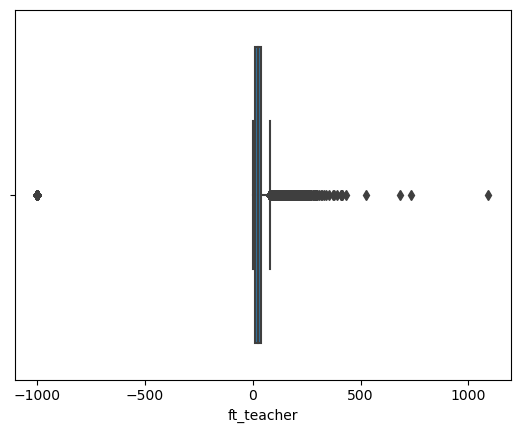

In [25]:
sns.boxplot(df3['ft_teacher'])

As we can see, there are several outliers. The box in our box plot is represented by that thick line close to 0 to 27 for the Boxplot 'charter_total'. Certain sites show outliers over the box and upper fence.

In [26]:
#Checking the highest values where the condition is False
index=np.where(df3.ft_teacher==max(df3.ft_teacher)) # Checking the highest values where the condition is False.
df3.ft_teacher.loc[index]

27213    1093
Name: ft_teacher, dtype: int32

In [27]:
# Finding the lower quartile (Q1)
Q1= df3.ft_teacher.quantile(0.25)
Q1

12.0

In [28]:
# Finding the upper quartile (Q3) 
Q3= df3.ft_teacher.quantile(0.75)
Q3

39.0

In [29]:
# Finding interquartile range(IQR)
IQR= Q3-Q1
IQR

27.0

In [30]:
# Finding the lower limit
lower_limit=Q1-1.5*IQR
lower_limit

-28.5

In [31]:
# Finding the upper limit
upper_limit=Q3+1.5*IQR
upper_limit

79.5

### Step 6: Deal with Outliers

There is no single approach to dealing with outliers, just like missing values. To reduce their impact, we can keep, remove, or alter them in some way. Only for completing this exercise I choose to filter out outliers.

In [32]:
# Using operators | to filter out outliers
df3[(df3.ft_teacher<lower_limit/(df3.ft_teacher>upper_limit))]

,objectid,ncesid,name,address,city,state,zip,zip4,telephone,type,...,val_method,val_date,website,level,enrollment,st_grade,end_grade,districtid,ft_teacher,shelter_id


In [33]:
# Using operators & to filter out outliers
df3=df3[(df3.ft_teacher> lower_limit)&(df3.ft_teacher<upper_limit)]

<AxesSubplot:xlabel='ft_teacher'>

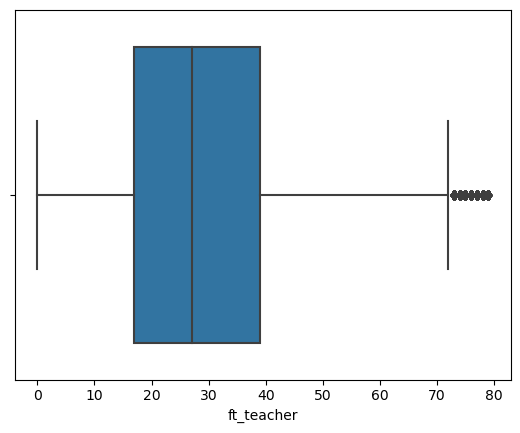

In [34]:
sns.boxplot(df3['ft_teacher']) # Using Box Plot for Visualization without outliers

###  Step 7: Find duplicates

The duplicated() method provides a Series with True and False values indicating which rows in the DataFrame are duplicated and which are not.  If all the values in a row are the same, duplicated() by default interprets the row as a whole as a duplicate. It also believes the initial row to be unique, so it will always return False because a duplicate row won't appear until the subsequent occurrence.

In [35]:
df3.duplicated() # Finding duplicate value in the data 

0         False
2         False
3         False
4         False
5         False
          ...  
107292    False
107293    False
107295    False
107296    False
107297    False
Length: 91020, dtype: bool

As we can see the duplicated() method returns a series with False values that indicate there are no duplicate values in the data frame

### Step 8: Group data 

A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups.

In [36]:
# Group by 'state','naics_code','naics_desc'columns
grouped_df = df3.groupby(['state','naics_code','naics_desc'])

In [37]:
# Calculating the sum of the 'population','enrollment','ft_teacher'columns for each group
grouped_sum = grouped_df['population','enrollment','ft_teacher'].sum()

In [38]:
# Creating a new dataframe from the groupby result
group_column = grouped_sum.reset_index()

In [39]:
df_school=pd.DataFrame(group_column) # Putting the new data to a Dataframe
df_school.head() # checking the first rows

,state,naics_code,naics_desc,population,enrollment,ft_teacher
0,AK,611110,elementary and secondary schools,141332,133691,7641
1,AL,611110,elementary and secondary schools,745121,693002,41130
2,AR,611110,elementary and secondary schools,468954,435176,33778
3,AZ,611110,elementary and secondary schools,768137,721306,42835
4,CA,611110,elementary and secondary schools,5021381,4782789,216614


In [40]:
df_school.shape # Returning a tuple representing the dimensionality of the DataFrame

(54, 6)

In [41]:
df_school.to_csv("C:/Users/79bar/dsc540/school1.csv")

### The ethical implications of data wrangling specific to your datasource and the steps you completed.

**API:  US Public School**

I recently worked with a dataset obtained through Opendatasoft Explore API v2, which follows a REST architecture and provides access to all data available on the platform in a logical, hierarchical manner. This dataset is licensed under the public domain, meaning that no one holds exclusive intellectual property rights. As a result, anyone can legally use or reference this dataset without permission. 

My goal in working with this dataset was to clean the data, which involved several steps, such as converting strings to lower or proper case, identifying and addressing missing data, dealing with inconsistent values, finding outliers, identifying duplicates, and grouping data by state. During this process, I filled in missing data with the string 'not available' and removed outliers from the 'ft_teacher' column. I made these modifications for the sole purpose of practicing how to handle missing data and outliers as part of this project. 

The dataset I worked with was collected by the Common Core of Data (CCD; https://nces.ed.gov/ccd/), National Center for Education Statistics (NCES; https://nces.ed.gov), and the US Department of Education for the 2017-18 school year. This Public Schools feature dataset includes all public elementary and secondary education facilities in the country.
